In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy import stats
import scipy.io

In [4]:
def signaltonoiseScipy(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [2]:
N = 2048
A = 5
f = 5
fs = 1000
dt = 1/fs
t = np.arange(N) * dt

In [3]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams['font.size'] = '13'

In [4]:
x = A * np.sin(2 * np.pi * f * t) + A *np.random.normal(0, 1, N)

In [5]:
widmo_sygnalu = 20 * np.log10(np.abs(np.fft.rfft(x * np.hamming(N))) / N/2)
f = np.fft.rfftfreq(N, 1 / fs)

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'amplituda [dB]'),
 Text(0.5, 1.0, 'Widmo zaszumionego sygnał')]

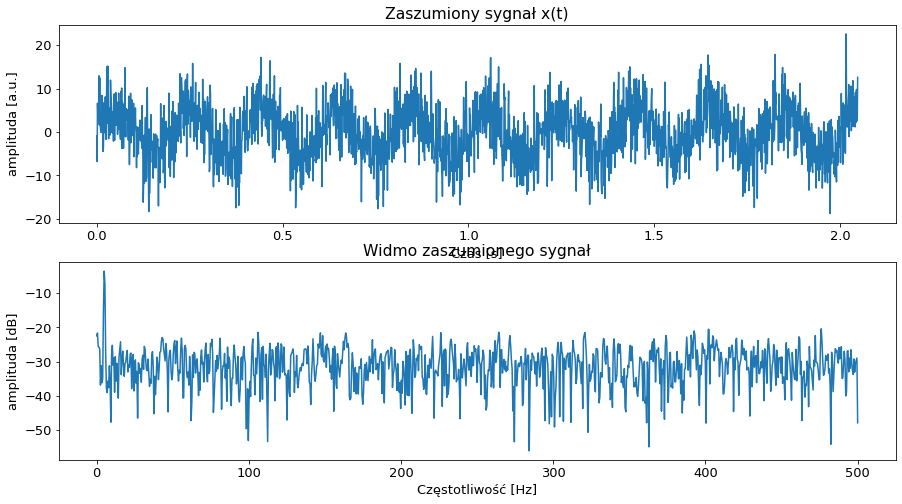

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,x)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Zaszumiony sygnał x(t)')
ax2.plot(f, widmo_sygnalu)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo zaszumionego sygnał')


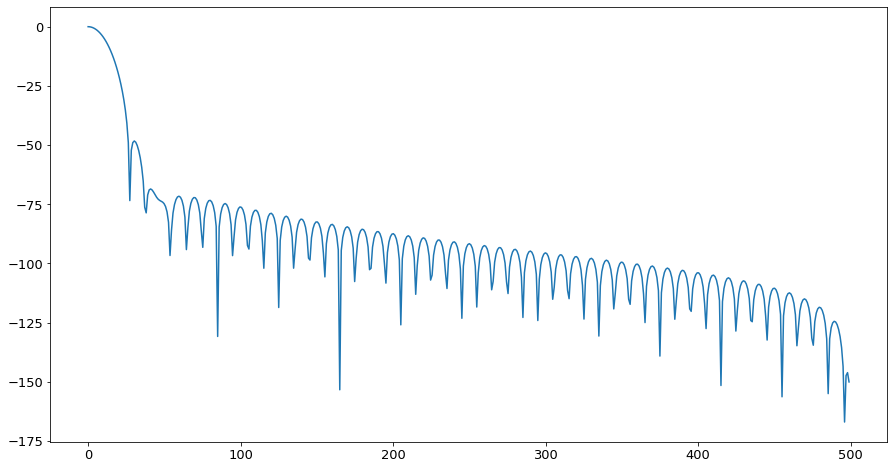

In [7]:
dp_100 = sig.firwin(100, 10, fs=fs)
w, char_100 = sig.freqz(dp_100)
ff = w * fs / (2 * np.pi)
plt.plot(ff, 20 * np.log10(np.abs(char_100)))

In [8]:
przefiltrowany = sig.lfilter(dp_100, 1, x)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(przefiltrowany * np.hamming(N))) / N/2)

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'amplituda [dB]'),
 Text(0.5, 1.0, 'Widmo zaszumionego sygnał')]

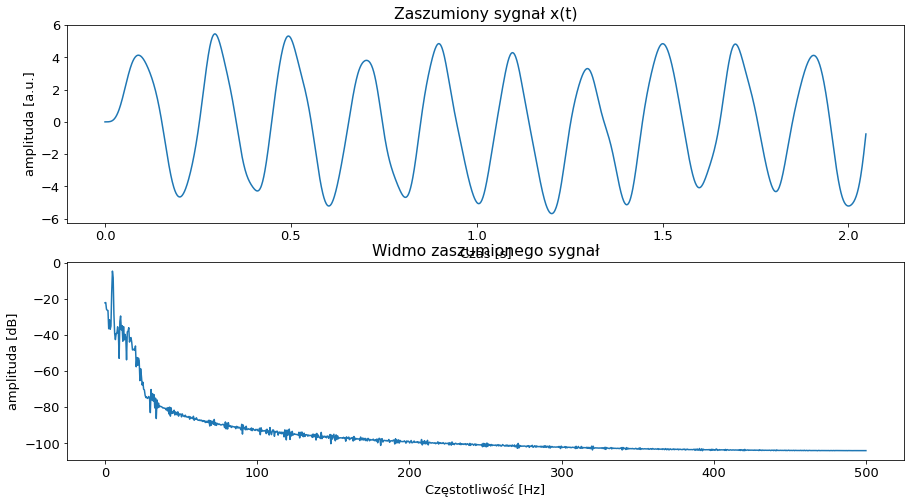

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,przefiltrowany)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Zaszumiony sygnał x(t)')
ax2.plot(f, widmo_przefiltrowany)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo zaszumionego sygnał')


In [10]:
gp = sig.firwin(101, 100, pass_zero=False, fs=fs)

In [11]:
przefiltrowany = sig.lfilter(gp, 1, x)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(przefiltrowany * np.hamming(N))) / N/2)

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'amplituda [dB]'),
 Text(0.5, 1.0, 'Widmo zaszumionego sygnał')]

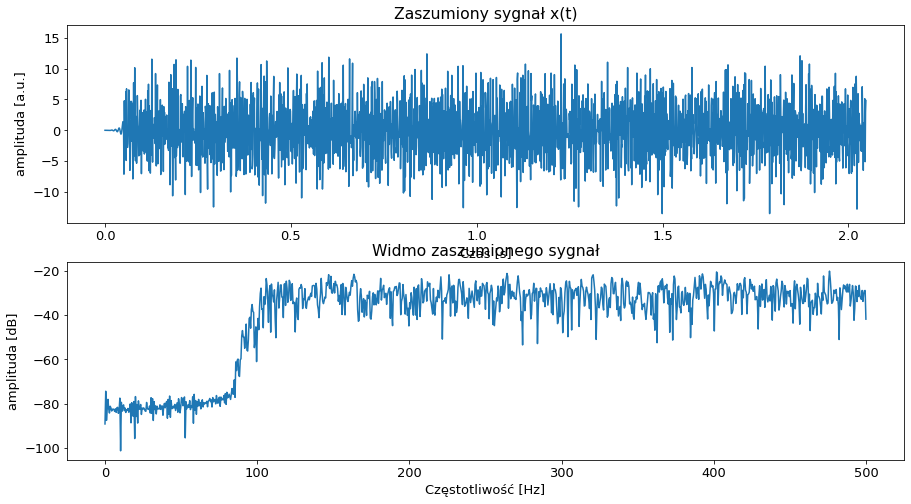

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,przefiltrowany)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Zaszumiony sygnał x(t)')
ax2.plot(f, widmo_przefiltrowany)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo zaszumionego sygnał')


In [13]:
def signaltonoise_dB(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return 20*np.log10(abs(np.where(sd == 0, 0, m/sd)))

In [14]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [15]:
b, a = sig.iirfilter(8, 10 / (fs / 2), ftype='butter', btype='lowpass')

In [16]:
przefiltrowany = sig.lfilter(b, a, x)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(przefiltrowany * np.hamming(N))) / N/2)

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'amplituda [dB]'),
 Text(0.5, 1.0, 'Widmo zaszumionego sygnał')]

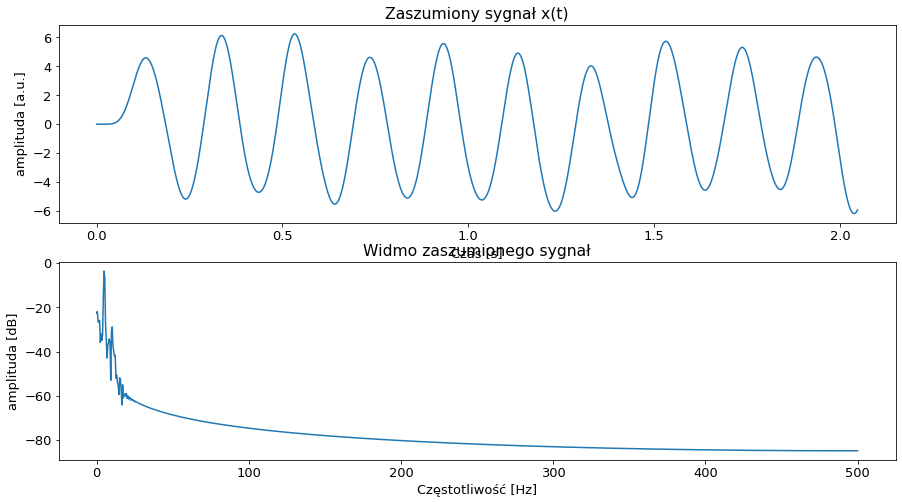

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,przefiltrowany)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Zaszumiony sygnał x(t)')
ax2.plot(f, widmo_przefiltrowany)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo zaszumionego sygnał')


In [18]:
b, a = sig.iirfilter(8, 100 / (fs / 2), ftype='butter', btype='highpass')

In [19]:
przefiltrowany = sig.lfilter(b, a, x)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(przefiltrowany * np.hamming(N))) / N/2)

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'amplituda [dB]'),
 Text(0.5, 1.0, 'Widmo zaszumionego sygnał')]

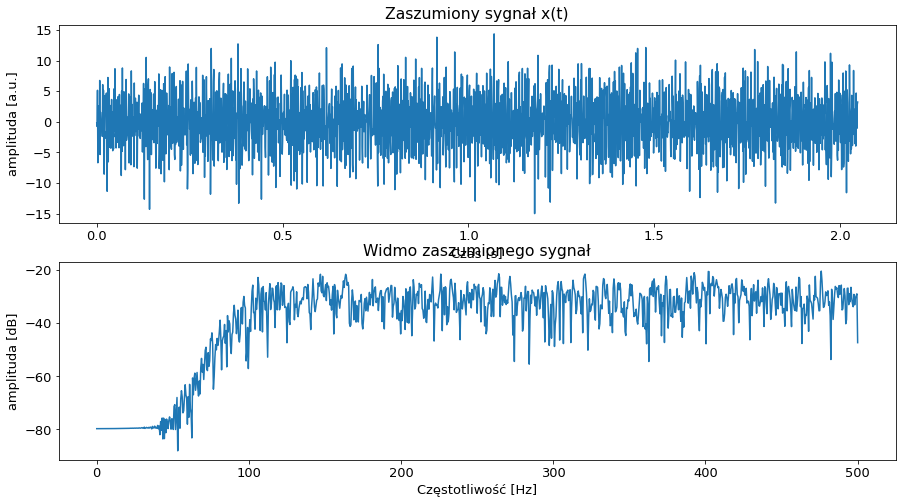

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,przefiltrowany)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Zaszumiony sygnał x(t)')
ax2.plot(f, widmo_przefiltrowany)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo zaszumionego sygnał')


In [21]:
f1 = 5
f2 = 50
y = A * np.sin(2*np.pi*f1*t)+2*np.sin(10*np.pi*f2*t)

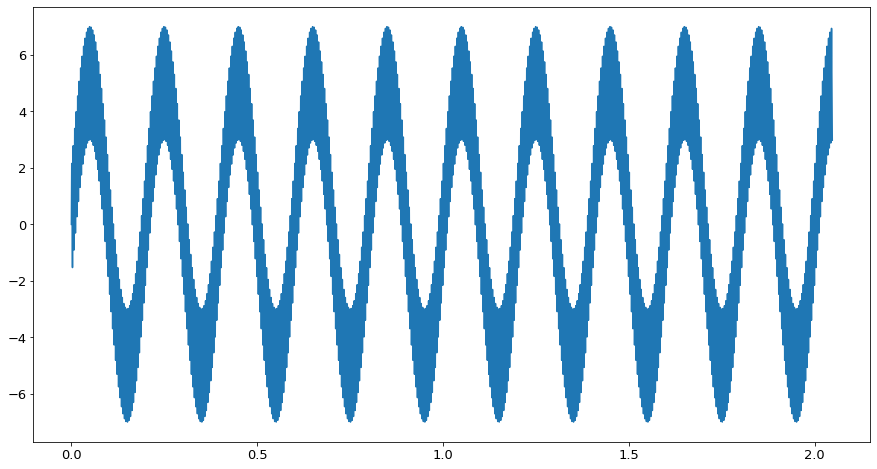

In [22]:
plt.plot(t,y)

In [23]:
dp_10 = sig.firwin(100, 10, fs=fs)

przefiltrowany = sig.lfilter(dp_10, 1, y)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(przefiltrowany * np.hamming(N))) / N/2)

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'amplituda [dB]'),
 Text(0.5, 1.0, 'Widmo zaszumionego sygnał')]

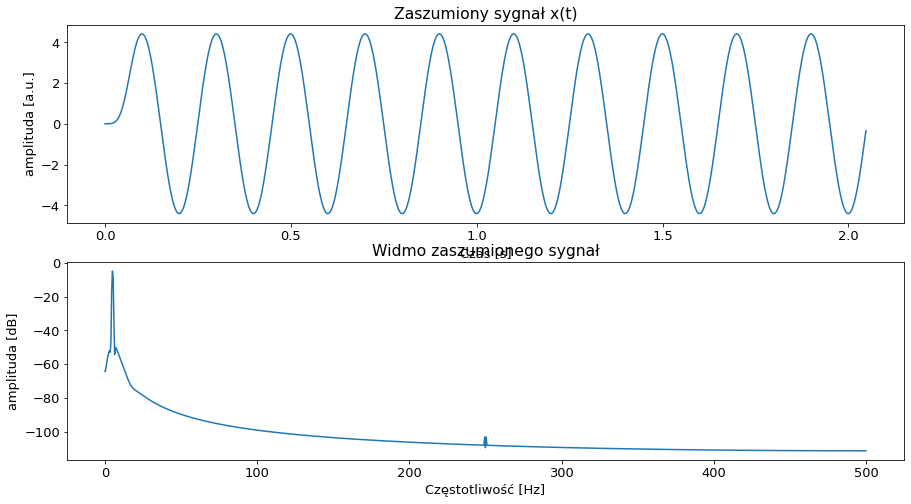

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,przefiltrowany)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Zaszumiony sygnał x(t)')
ax2.plot(f, widmo_przefiltrowany)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo zaszumionego sygnał')


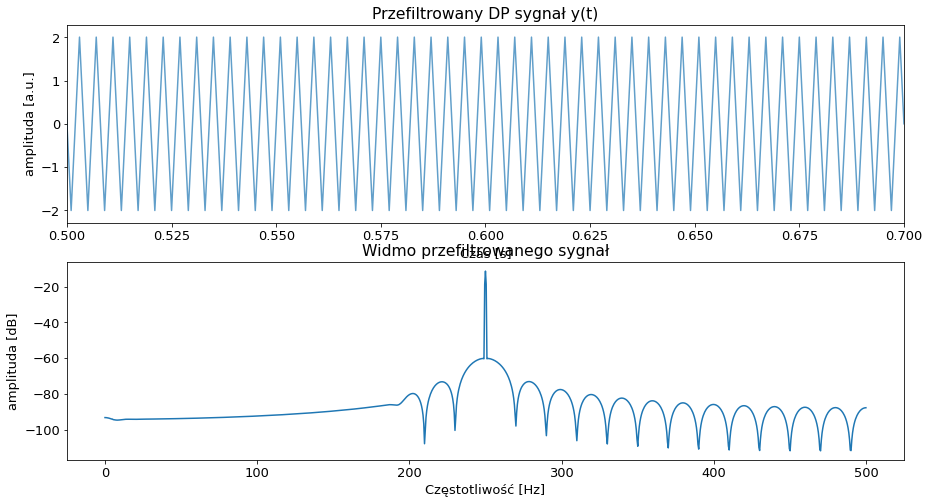

In [25]:
gp_200 = sig.firwin(101, 200, pass_zero=False, fs=fs)

przefiltrowany = sig.lfilter(gp_200, 1, y)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(przefiltrowany * np.hamming(N))) / N/2)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,przefiltrowany, alpha =0.7)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Przefiltrowany DP sygnał y(t)', xlim=(0.5, 0.7))
ax2.plot(f, widmo_przefiltrowany)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo przefiltrowanego sygnał')
plt.show()

In [26]:
mat = scipy.io.loadmat('ecg.mat') 
ecg = mat['ecg']
N = ecg.shape[0]
ecg = ecg.reshape(N)
fs = 500
dt = 1/fs
t = np.arange(N) * dt

In [27]:
widmo_ecg = 20 * np.log10(np.abs(np.fft.rfft(ecg * np.hamming(N))) / N/2)
f = np.fft.rfftfreq(N, 1 / fs)

[Text(0.5, 0, 'Częstotliwość [Hz]'),
 Text(0, 0.5, 'amplituda [dB]'),
 Text(0.5, 1.0, 'Widmo zaszumionego sygnał')]

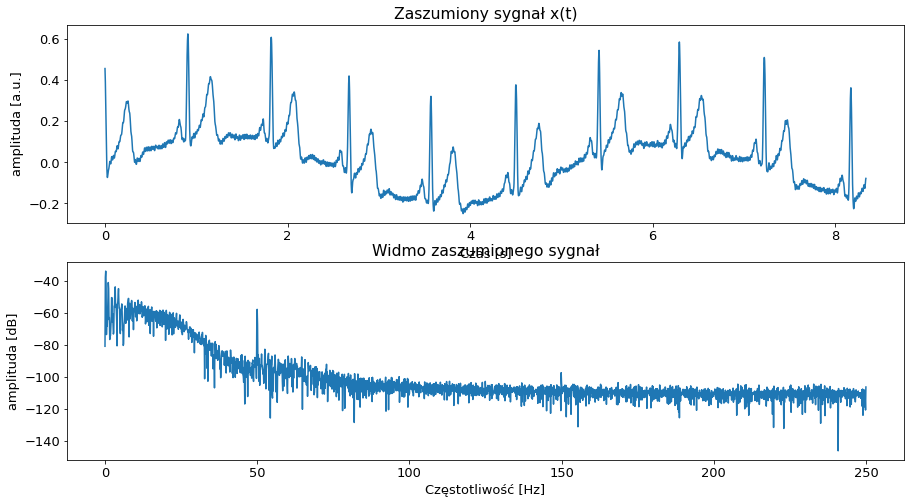

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,ecg)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Zaszumiony sygnał x(t)')
ax2.plot(f, widmo_ecg)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo zaszumionego sygnał')

In [29]:
dp_30 = sig.firwin(100, 40, fs=fs)

przefiltrowany = sig.lfilter(dp_30, 1, ecg)
widmo_przefiltrowany = 20 * np.log10(np.abs(np.fft.rfft(przefiltrowany * np.hamming(N))) / N/2)

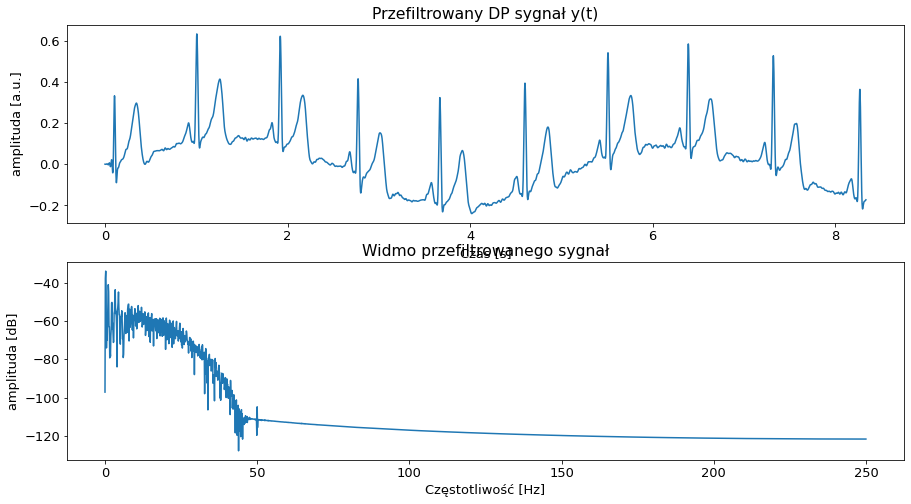

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,przefiltrowany)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Przefiltrowany DP sygnał y(t)')
ax2.plot(f, widmo_przefiltrowany)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo przefiltrowanego sygnał')
plt.show()

In [35]:
gp_10 = sig.firwin(101, 8, pass_zero=False, fs=fs)

przefiltrowany2 = sig.lfilter(gp_10, 1, przefiltrowany)
widmo_przefiltrowany2 = 20 * np.log10(np.abs(np.fft.rfft(przefiltrowany * np.hamming(N))) / N/2)

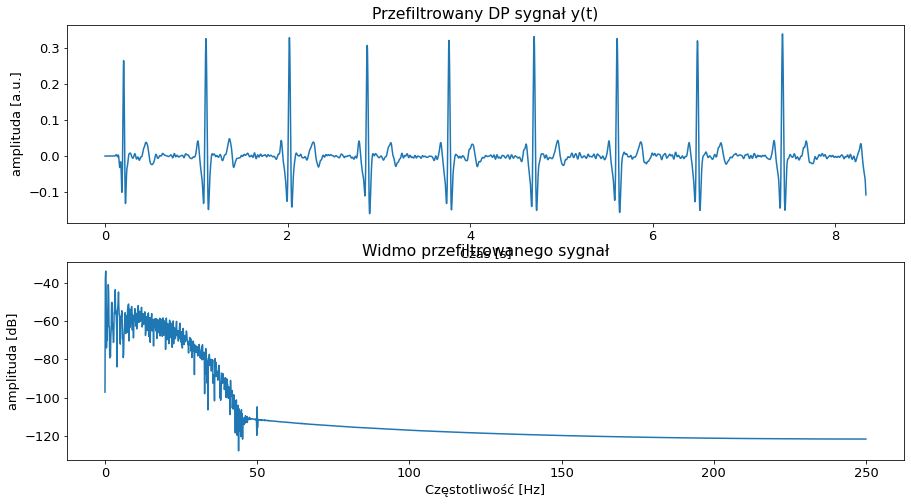

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,przefiltrowany2)
ax1.set(xlabel='Czas [s]', ylabel='amplituda [a.u.]', title='Przefiltrowany DP sygnał y(t)')
ax2.plot(f, widmo_przefiltrowany2)
ax2.set(xlabel='Częstotliwość [Hz]', ylabel='amplituda [dB]', title='Widmo przefiltrowanego sygnał')
plt.show()